# Midterm 52002 - 2022-23
# BigQuery & SQL

BigQuery is Google's serverless data warehouse that enables scalable analysis   
over petabytes of data. It is a Platform as a Service (PaaS) that supports querying   
using SQL. In this part of the midterm you'll be asked to query BigQuery tables    
using its python API. Please use the `sandbox` BigQuery environment and query   
only public datasets. 

**Please note:**
Your BigQuery's resources are limited to 1 TB per user per month - be mindful with how many queries you   
execute and try to optimize your queries as much as possible.

The main dataset of interest is part of the "NYC Open Data" initiative, which makes   
public data generated by different city agencies available for public use.     

Specifically, the 311 calls or service requests dataset contains requests from 2010   
to present (2022) regarding various residents' complaints.    

More information on the data can be found [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) and [here](https://www.kaggle.com/datasets/nycopendata/new-york).   

**Guidelines:**  
1. Fill this notebook with python commands including SQL queries in the designated places, run it using a jupyter notebook environment (e.g. google colab), save the resulting ipynb file with the results before submitting. 
2. Please write efficient SQL queries and code. Points may be taken off for     
    inefficient queries and code.
3. The python API enables us to write code that interacts with BigQuery and convert between the SQL tables to python objects, thus allowing analysis and plotting using python code. You should write your SQL commands within the API. It is recommended to browse the dataset in the BigQuery web-browser, and try running your SQL command there before copying it to the python notebool.      
4. Please only use the method `dataframe.plot.[kind]()` to create visuzalizations, where `[kind]` refers to the type of plot that you want to use.
   In addition, your plots should be clear, with titles, and with propoer x-y labels. 
5. When reading BigQuery tables, used the `` symbols to around the table's name.

**Necessary Libraries:**  
(Do not use any libraries that are not in this list without permission form the course staff)

Student's ID:

ID: 312363666

ID: 312297559

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery
from sqlite3 import connect

### Q1: BigQuery client & Initital Query 
1a. Construct a BigQuery client object using the `client` method of the `bigquery` module.  
1b. Using this object, query 2000 rows  from `bigquery-public-data.new_york.311_service_requests`.       
   Assign the output as a list of lists to the variable `output`.  Display the first  row.   
1c. Using the method `result().schema`, you can retrieve also the header of the output.     
   Create a pandas dataframe `df` of the output with the relevant header.   
   Display the 5 first rows.  

Answer:

In [54]:
# 1a)
# Construct a BigQuery client 
key_path = r'C:\Users\Aviad\Studies\Big Data Mining\midterm-sql-project-52002-e4d387fcf9aa.json'
client = bigquery.Client.from_service_account_json(key_path) # replace right-hand-side here using the bigquery.Client command

In [55]:
# 1b)
# query_job = client.query(query)  # Make an API request.

query = """
    SELECT *
    FROM `bigquery-public-data.new_york.311_service_requests`
    LIMIT 2000
"""
query_job = client.query(query)

results = query_job.result()

output = [list(row.values()) for row in results]

print(output[0])

[48232059, datetime.datetime(2020, 11, 23, 12, 31, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 11, 22, 10, 0, tzinfo=datetime.timezone.utc), 'DOT', 'Department of Transportation', 'Street Light Condition', 'Photocell (PEC) Missing', None, None, None, None, None, None, None, None, 'INTERSECTION', None, None, None, 'Pending', None, 'Service Request status for this request is available on the Department of Transportationâ€™s website. Please click the â€œLearn Moreâ€  link below.', datetime.datetime(2020, 11, 22, 10, 0, tzinfo=datetime.timezone.utc), None, None, None, None, 'Unspecified', None, None, 'UNKNOWN', None, None, None, None, None, None, None, None, None, None]


In [56]:
# 1c) 
# Use query_job.result().schema to convert results to a pandas df

schema = results.schema
header = [field.name for field in schema]

df = pd.DataFrame(output, columns=header)

# Display the first 5 rows of the dataframe
df.head(5)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pickup_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,48232059,2020-11-23 12:31:00+00:00,2020-11-22 10:00:00+00:00,DOT,Department of Transportation,Street Light Condition,Photocell (PEC) Missing,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,None
1,48232085,2020-11-23 12:21:00+00:00,2020-11-23 12:21:00+00:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,None
2,48232139,2020-11-23 11:14:00+00:00,2020-11-23 11:14:00+00:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,None
3,48232144,2020-11-23 08:52:00+00:00,2020-12-18 12:12:00+00:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,None
4,48232202,2020-11-23 13:16:00+00:00,2020-11-22 01:05:00+00:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,None


### Q2: NYC 311 Total Complaints by Year & Agency
2a.  a pandas dataframe `df2`. Display the firstWrite a query that returns for each year, agency, and complaint_type,   
   the total number of complaints (sorted in decreasing order by number of complaints).  
   Load the output into 5 rows.  
2b. Using the method `pd.read_sql_quer` on the output dataframe `df2`, apply an sql query on `df2` that sorts the agencies by the total number of complaints that they get over the years. Show the sorted agencies with their number of complaints visually using a method `plot.[kind]()`.   
2c. Using the method `pd.read_sql_quer`, apply an sql query on `df2` to find complaints related to the Coronavirus for the relevant years and agencies. Show the appropriate rows. 

Answer:

In [57]:
# 2a)
# Fill query

query2 = """
    SELECT EXTRACT(YEAR FROM created_date) AS year, agency, complaint_type, COUNT(*) AS total_complaints
    FROM `bigquery-public-data.new_york.311_service_requests`
    GROUP BY year, agency, complaint_type
    ORDER BY total_complaints DESC
"""

query_job2 = client.query(query2)   # Make an API request.

results2 = query_job2.result()

# Get the schema and header
schema2 = results2.schema
header2 = [field.name for field in schema2]

# Store the results as a list of lists
output2 = [list(row.values()) for row in results2]

# Create a Pandas dataframe with the relevant header
df2 = pd.DataFrame(output2, columns=header2)

# Display the DataFrame
df2.head(5)



,year,agency,complaint_type,total_complaints
0,2020,NYPD,Noise - Residential,407093
1,2021,NYPD,Noise - Residential,362290
2,2021,NYPD,Illegal Parking,317982
3,2021,DSNY,Request Large Bulky Item Collection,303031
4,2020,DSNY,Request Large Bulky Item Collection,282109


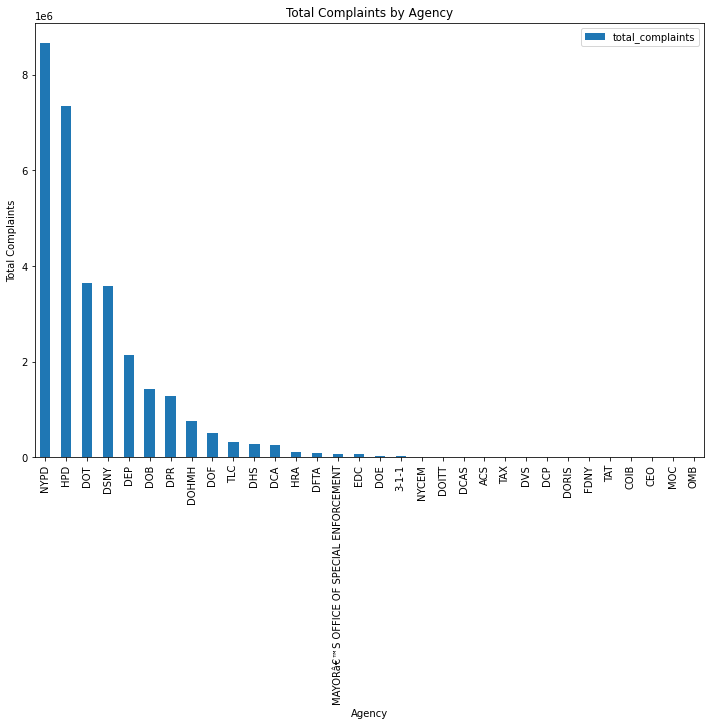

In [58]:
# 2b) 
conn = connect(':memory:')
df2.to_sql('df2', conn)

# Run SQL query for df2 and plot results

sorted_df = pd.read_sql_query(
    "SELECT agency, SUM(total_complaints) AS total_complaints "
    "FROM df2 "
    "GROUP BY agency "
    "ORDER BY total_complaints DESC",
    con=conn
)

# Plot the sorted agencies and their number of complaints
sorted_df.plot(kind='bar', x='agency', y='total_complaints', figsize=(12, 8))
plt.xlabel('Agency')
plt.ylabel('Total Complaints')
plt.title('Total Complaints by Agency')
plt.show()

It isn't surprising to find that most complaints were opened with the police department. Also, we see that the rest of the compaintes were opened with departments that deal with sanitery and day to day living situation.

In [59]:
# 2c)
# Run SQL query for df2 and display results


filtered_rows = pd.read_sql_query(
    "SELECT year, agency, complaint_type "
    "FROM df2 "
    "WHERE complaint_type IN ('NonCompliance with Phased Reopening','Vaccine Mandate Non-Compliance', 'Private School Vaccine Mandate Non-Compliance','COVID-19 Non-essential Construction', 'Mass Gathering Complaint') AND year >= 2019 ",
    con=conn
)
#The query referse to 2019 on purpose in order to make sure the complaints came after the covid-19 outbreak in the us, which occurred in the beginning of 2020.

# Show the appropriate rows
filtered_rows

,year,agency,complaint_type
0,2020,MAYORâ€™S OFFICE OF SPECIAL ENFORCEMENT,NonCompliance with Phased Reopening
1,2021,MAYORâ€™S OFFICE OF SPECIAL ENFORCEMENT,NonCompliance with Phased Reopening
2,2020,DOB,COVID-19 Non-essential Construction
3,2021,DOHMH,Vaccine Mandate Non-Compliance
4,2020,MAYORâ€™S OFFICE OF SPECIAL ENFORCEMENT,Mass Gathering Complaint
5,2022,DOHMH,Vaccine Mandate Non-Compliance
6,2021,MAYORâ€™S OFFICE OF SPECIAL ENFORCEMENT,Mass Gathering Complaint
7,2021,DOB,COVID-19 Non-essential Construction
8,2020,NYPD,Mass Gathering Complaint
9,2020,NYPD,NonCompliance with Phased Reopening


The compalints related to COVID-19 we found are:

NonCompliance with Phased Reopening- violation of guidelines or regulations related to the phased reopening of certain activities or establishments. The authorities often implement specific guidelines and restrictions to ensure public health and safety. These guidelines may include capacity limits, social distancing requirements, mask mandates, hygiene protocols, and other measures to prevent the spread of diseases such as COVID-19.

COVID-19 Non-essential Construction- refers to complaints or reports related to construction activities that are deemed non-essential during the Covid-19 pandemic.

Vaccine Mandate Non-Compliance and Private School Vaccine Mandate Non-Compliance-  individuals or entities fail to comply with a vaccine mandate. A vaccine mandate is a requirement or policy that mandates individuals to receive a specific vaccine, typically for public health or safety reasons. 

Mass Gathering Complaint - refers to a type of complaint related to gatherings or events that involve a large number of people

### Q3: NYC 311 Total Complaints by Year & Agency (Cont'd)  
Please use the simplifying SQL statement `WITH` within your query to answer the following questions:   
3a. Using the method `pd.read_sql_quer`, apply an sql query on `df2` that extracts the number of noise related complaints (rows) that are coming from agencies with less than a total of 10k complaints a year, irrespectively of hte complaint type.  
3b. Using the method `pd.read_sql_quer`, apply an sql query on `df2` to find the 5 most common compaint types per year over all agencies. Show them visually using  the method `plot.[kind]()`.   
   Hint: you can use a [window function](https://www.sqltutorial.org/sql-window-functions/). 

Answer

In [60]:
# 3a) 
# Run SQL query for df2 and display results

query3a = """
    WITH total_complaints AS (
        SELECT year, agency
        FROM df2
        GROUP BY year, agency
        HAVING SUM(total_complaints) < 10000
    )
    SELECT *
    FROM df2
    WHERE (year, agency) IN (
        SELECT year, agency FROM total_complaints
    ) AND complaint_type LIKE '%noise%'
"""

result_noise = pd.read_sql_query(query3a, conn)

result_noise.head(5)

,index,year,agency,complaint_type,total_complaints
0,613,2012,3-1-1,Noise Survey,8801
1,667,2011,3-1-1,Noise Survey,7500
2,944,2019,EDC,Noise - Helicopter,3332
3,1270,2015,EDC,Noise - Helicopter,1505
4,1330,2014,EDC,Noise - Helicopter,1289


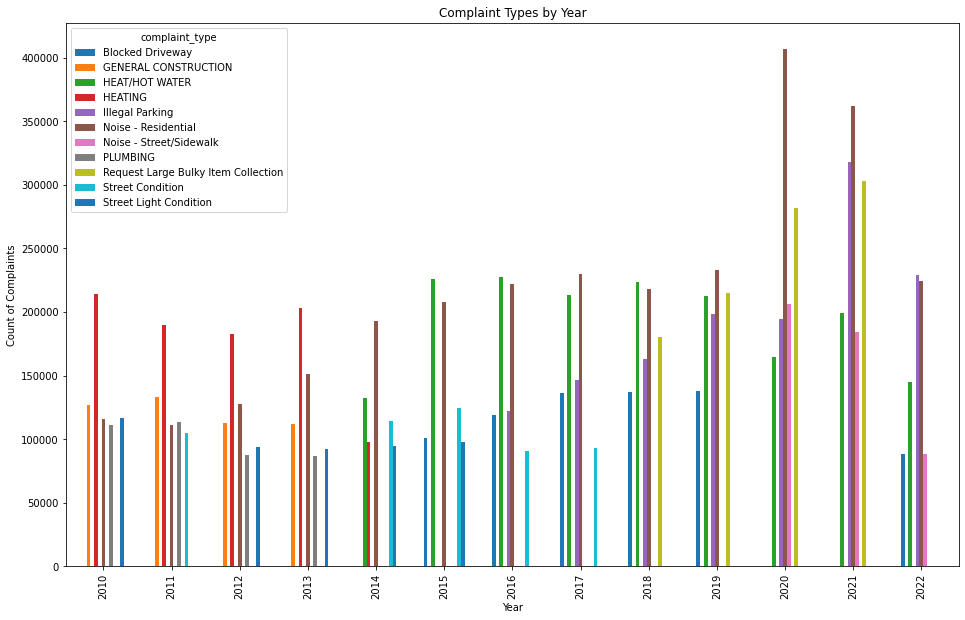

In [61]:
# 3b)
# # Run SQL query for df2 and plot results

query3b = """
SELECT year
      ,complaint_type
      ,total_complaints
FROM
(
  SELECT year
          ,complaint_type
          ,SUM(total_complaints) AS total_complaints
          ,row_number () over (partition by year ORDER BY SUM(total_complaints) DESC) AS rank
  FROM df2 
  GROUP BY 1,2
)
WHERE RANK <= 5
ORDER BY 1,3 DESC
"""

result3b = pd.read_sql_query(query3b, conn)

grouped_df = result3b.groupby(['year', 'complaint_type']).sum()['total_complaints']
df_for_plot = grouped_df.unstack('complaint_type')
df_for_plot.plot(kind='bar', width=0.6, figsize=(16, 10))
plt.xlabel('Year')
plt.ylabel('Count of Complaints')
plt.title('Complaint Types by Year')
plt.show()


### Q4: Incidents by ZIP
4a. Load the `zips` dataset available in the hurcs cluster at: `/sci/courses/2022/52002/orzuk/midterm/population_by_zip_2010.csv` into a pandas dataframe, and add it as an SQL table using the `to_sql` method. Display the first 5 rows. 

4b. Separately, query the `bigquery-public-data.new_york.311_service_requests` dataset to get for each zip code that is not `null`, the number of total complaints, separated by wether or not the request was closed within 1 business day of filing. Save the output into `df3`. Display the first 5 rows.  

4c. We would like to know which zip code has the highest ratio of compaints per total size of population for that zip code. Find and display the full row of that datapoint, for complaints that were closed or not within 1 buisness day, separately.

Answer

In [62]:
# 4a)
# Read zips dataset into pandas dataframe and display results
df_zips = pd.read_csv('C:/Users/Aviad/Studies/Big Data Mining/population_by_zip_2010.csv')

# # Convert the dataframe to an SQL table
df_zips.to_sql('zips', conn, index=False,if_exists='replace')

# Display the first 5 rows of the dataframe
query4a = "SELECT * FROM zips"
result4a = pd.read_sql_query(query4a, conn)
result4a.head(5)


,population,minimum_age,maximum_age,gender,zipcode,geo_id
0,50,30.0,34.0,female,61747,8600000US61747
1,5,85.0,NaN,male,64120,8600000US64120
2,1389,30.0,34.0,male,95117,8600000US95117
3,231,60.0,61.0,female,74074,8600000US74074
4,56,0.0,4.0,female,58042,8600000US58042


In [79]:

# # 4b)
# Run SQL query and display results

#Note that in the following query, in case of a null value the difference won't be considered and hence won't be counted as closed within or after
#1 busines sday, but will be counted as part of the total_compalints
query4b = """
    SELECT incident_zip,
        SUM(CASE WHEN TIMESTAMP_DIFF(resolution_action_updated_date, created_date, DAY) < 1 THEN 1 ELSE 0 END) AS closed_within_1_business_day,
        SUM(CASE WHEN TIMESTAMP_DIFF(resolution_action_updated_date, created_date, DAY) >= 1 THEN 1 ELSE 0 END) AS closed_after_1_business_day,
        COUNT(*) AS total_complaints
    FROM `bigquery-public-data.new_york.311_service_requests`
    WHERE incident_zip IS NOT NULL
    GROUP BY 1
    ORDER BY 4 DESC
"""

df3 = client.query(query4b).to_dataframe()
df3.head(5)


,incident_zip,closed_within_1_business_day,closed_after_1_business_day,total_complaints
0,11226,186453,322594,511488
1,10467,167058,264799,434339
2,10466,207614,184875,420892
3,11385,205850,187490,396211
4,11207,163182,224953,391020


In [80]:
# 4c) 
df3.to_sql('incident_zip', conn,if_exists='replace')
# Run SQL query and display results


query4c_within_1_day = """
SELECT a.incident_zip,
      a.closed_within_1_business_day,
      b.population,
      a.total_complaints,
      a.closed_within_1_business_day/b.population as ratio_closed_within_1_business_day
FROM incident_zip a
JOIN (
    SELECT zipcode, SUM(population) as population
    FROM zips
    GROUP BY zipcode
) b ON a.incident_zip = b.zipcode
ORDER BY ratio_closed_within_1_business_day DESC
LIMIT 1
"""
result4c_within_1_day = pd.read_sql_query(query4c_within_1_day, conn)


result4c_within_1_day

,incident_zip,closed_within_1_business_day,population,total_complaints,ratio_closed_within_1_business_day
0,10173,152,6,181,25


In [81]:
query4c_after_1_day = """
SELECT a.incident_zip,
      a.closed_after_1_business_day,
      b.population,
      a.total_complaints,
      a.closed_after_1_business_day/b.population as ratio_closed_after_1_business_day
FROM incident_zip a
JOIN (
    SELECT zipcode, SUM(population) as population
    FROM zips
    GROUP BY zipcode
) b ON a.incident_zip = b.zipcode
ORDER BY ratio_closed_after_1_business_day DESC
LIMIT 1
"""
result4c_after_1_day = pd.read_sql_query(query4c_after_1_day, conn)

result4c_after_1_day

,incident_zip,closed_after_1_business_day,population,total_complaints,ratio_closed_after_1_business_day
0,10103,163,9,393,18
